**Feature Engineering on Facebook Dataset** 

In [1]:
#Importing Libraries
# please do go through this python notebook: 
import warnings
warnings.filterwarnings("ignore")

import csv
import pandas as pd#pandas to create small dataframes 
import datetime #Convert to unix time
import time #Convert to unix time

# if numpy is not installed already : pip3 install numpy
import numpy as np#Do aritmetic operations on arrays

# matplotlib: used to plot graphs
import matplotlib
import matplotlib.pylab as plt
import seaborn as sns#Plots
from matplotlib import rcParams#Size of plots  
from sklearn.cluster import MiniBatchKMeans, KMeans#Clustering
import math
import pickle
import os

# to install xgboost: pip3 install xgboost
import xgboost as xgb

import warnings
import networkx as nx
import pdb
import pickle
from pandas import HDFStore,DataFrame
from pandas import read_hdf
from scipy.sparse.linalg import svds, eigs
import gc
from tqdm import tqdm

# 1. Reading Data

In [2]:
#Reading data from CSV file
original_dataset = pd.read_csv('train.csv')
original_dataset.shape

(9437519, 2)

In [3]:
original_dataset.head()#Displaying first 5 values

,source_node,destination_node
0,1,690569
1,1,315892
2,1,189226
3,2,834328
4,2,1615927


In [4]:
original_dataset.info()#Displaying dataset info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9437519 entries, 0 to 9437518
Data columns (total 2 columns):
 #   Column            Dtype
---  ------            -----
 0   source_node       int64
 1   destination_node  int64
dtypes: int64(2)
memory usage: 144.0 MB


In [5]:
original_dataset.isnull().sum()#Checking for null values in dataset

source_node         0
destination_node    0
dtype: int64

In [6]:
original_dataset.duplicated().sum()#Checking duplicated values

0

## Sampling the 1 Million records

In [7]:
#training dataset
train_subset = pd.read_csv('train.csv', nrows=1000000)
train_subset.to_csv('train_subset.csv',header=False,index=False)

In [8]:
#Shape of the training dataset
train_subset.shape

(1000000, 2)

In [9]:
train_subset.head()

,source_node,destination_node
0,1,690569
1,1,315892
2,1,189226
3,2,834328
4,2,1615927


In [10]:
train_subset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 2 columns):
 #   Column            Non-Null Count    Dtype
---  ------            --------------    -----
 0   source_node       1000000 non-null  int64
 1   destination_node  1000000 non-null  int64
dtypes: int64(2)
memory usage: 15.3 MB


In [11]:
train_subset.isnull().sum()

source_node         0
destination_node    0
dtype: int64

In [12]:
train_subset.duplicated().sum()

0

In [13]:
#To find number of edges and nodes 
graph = nx.read_edgelist('train_subset.csv',delimiter=',',create_using=nx.DiGraph(),nodetype=int)
print(nx.info(graph))

DiGraph with 685775 nodes and 1000000 edges


## Number of Followers and Followees

In [14]:
#Defining number of followers function
def num_followers(a):
    return len(list(set(graph.predecessors(a))))

In [15]:
##Defining number of followees function
def num_followees(a):
    return len(list(set(graph.successors(a))))

In [16]:
train_subset['num_of_source_followers'] = train_subset.source_node.apply(num_followers)

In [17]:
train_subset.num_of_source_followers.unique()

array([ 1,  0,  2,  3,  4,  5,  6, 10,  9, 44,  8,  7, 17, 39, 18, 23, 28,
       11, 12, 32, 34, 14, 21, 13, 16, 19, 40, 15, 35, 22, 36, 29, 25, 20,
       45, 26, 50, 24, 30, 51, 31, 41])

In [18]:
#Counting values from list
value_counts = train_subset.num_of_source_followers.value_counts()
values = list(value_counts.index)[1:]
counts = list(value_counts)[1:]

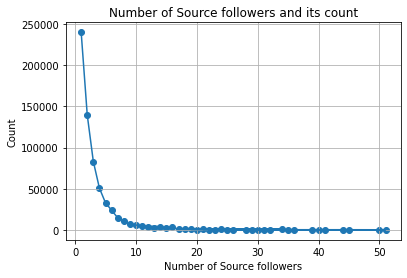

In [19]:
#Plotting scatter plot
plt.plot(values, counts)
plt.scatter(values, counts)

plt.xlabel("Number of Source followers")
plt.ylabel("Count")
plt.title("Number of Source followers and its count")
plt.grid()
plt.show()

In [20]:
train_subset['num_of_source_followees'] = train_subset.source_node.apply(num_followees)

In [21]:
#Displaying Unique Values
train_subset.num_of_source_followees.unique()

array([  3,   6,   2,   1,  12,  15,   5,   4,  30,   8,   9,  16,  21,
        17,   7,  11,  27,  13,  23,  47,  10,  37,  38,  20,  19,  18,
        14,  24,  29,  36,  32,  54,  50,  31,  35,  53,  34,  55,  57,
        22, 216,  26,  78,  25,  43,  52,  81,  41,  83, 134,  59, 110,
        33,  48,  40,  39,  42,  60,  73, 270,  70,  28,  58,  80,  44,
        66,  45, 194,  63,  97,  67,  92, 242,  51, 895,  71, 219, 101,
       107,  74, 112, 115,  64,  72,  91,  86, 126,  49,  46,  75,  65,
       118, 140,  69, 138, 123, 137,  56, 160,  82, 143, 164, 113,  79,
        68,  61,  85, 103, 106, 108, 100, 184,  93, 130,  62, 144,  87,
        98, 149, 239, 104, 120,  90, 249, 135,  77,  89,  94, 132, 155,
       148,  95,  99, 150, 125, 181, 142, 102, 280, 121, 217, 105, 205,
       116, 152, 109, 293,  88, 119, 165, 174, 275,  84, 156, 133, 131,
       327, 124, 117, 212, 252, 111, 154, 169, 183, 211, 129,  96, 228,
        76, 128, 175, 122, 210, 226, 208, 223, 200, 236, 176, 14

In [22]:
#Counting values from list
value_counts = train_subset.num_of_source_followees.value_counts()
values = list(value_counts.index)[1:]
counts = list(value_counts)[1:]

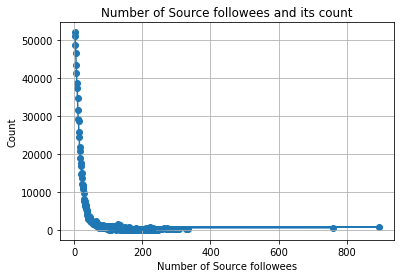

In [23]:
plt.plot(values, counts)
plt.scatter(values, counts)#Scatter Plot

plt.xlabel("Number of Source followees")
plt.ylabel("Count")
plt.title("Number of Source followees and its count")
plt.grid()
plt.show()

In [24]:
train_subset['num_of_destination_followers'] = train_subset.destination_node.apply(num_followers)

In [25]:
train_subset.num_of_destination_followers.unique()

array([ 3,  2,  5,  4,  1,  8, 11,  9,  6,  7, 10, 12, 18, 17, 13, 14, 28,
       15, 16, 20, 27, 24, 25, 41, 51, 48, 54, 49, 37, 39, 45, 44, 40, 42,
       43, 38, 34, 36, 33, 32, 23, 29, 30, 35, 31, 26, 22, 19, 21, 50, 46,
       47, 52])

In [26]:
value_counts = train_subset.num_of_destination_followers.value_counts()
values = list(value_counts.index)[1:]
counts = list(value_counts)[1:]

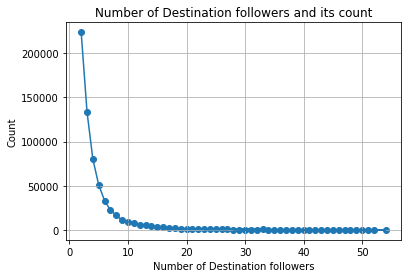

In [27]:
plt.plot(values, counts)
plt.scatter(values, counts)#Scatter Plot

plt.xlabel("Number of Destination followers")
plt.ylabel("Count")
plt.title("Number of Destination followers and its count")
plt.grid()
plt.show()

In [28]:
train_subset['num_of_destination_followees'] = train_subset.destination_node.apply(num_followees)

In [29]:

train_subset.num_of_destination_followees.unique()

array([  0,   4,  14,  31,   3,  19,  63,  18,   1,   2,  10,  13,  15,
        20,  17,  29,  11,  22,  32,  12,  24,   7,   6,  16,  26,   8,
        38,  27,   5,  44,  23,  36,   9,  40,  89,  51,  34,  28,  80,
        37,  33,  39,  25,  48,  21,  42,  61,  30,  35,  66,  56, 107,
       181,  65,  64,  84,  60,  72,  81,  41,  93, 200, 223, 212, 138,
       164, 235, 154, 160, 258, 128, 185, 122, 125, 158, 264, 121, 152,
        73,  97, 174,  99,  91, 130,  85, 169,  47, 196,  68,  53,  92,
       105,  52, 156,  98, 104, 147,  45,  49,  59,  69,  58,  71,  46,
       118, 123, 120, 100,  77,  94, 155,  57,  43, 106,  78, 187, 110,
       205, 245, 231, 139, 211, 153, 213, 135, 132,  62,  50,  74,  55,
       133,  83,  79,  76,  67, 216, 227, 165, 202, 198, 219, 166, 203,
       167,  87, 113, 109, 116, 144, 291,  54, 176,  75, 124, 136,  82,
        86,  95,  88, 140,  96, 141, 115, 148, 142, 103, 270, 173,  90,
       137,  70, 239, 129, 210, 117, 143, 252, 194, 184, 111, 27

In [30]:
value_counts = train_subset.num_of_destination_followees.value_counts()
values = list(value_counts.index)[1:]
counts = list(value_counts)[1:]

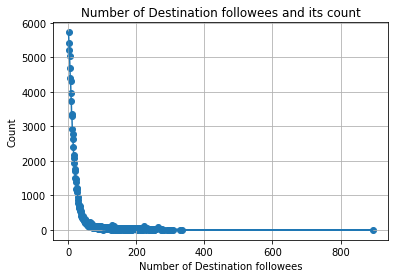

In [31]:
plt.plot(values, counts)
plt.scatter(values, counts)#Scatter Plot

plt.xlabel("Number of Destination followees")
plt.ylabel("Count")
plt.title("Number of Destination followees and its count")
plt.grid()
plt.show()

## Number of common followers and common followees

In [32]:
#Defining Number of common followers function
def num_of_common_followers(a,b):
    a_followers = list(set(graph.predecessors(a)))
    if b in a_followers:
        a_followers.remove(b)
    b_followers = list(set(graph.predecessors(b)))
    if a in b_followers:
        b_followers.remove(a)
    return len(set(a_followers).intersection(set(b_followers)))

In [33]:
#Defining Number of common followees function
def num_of_common_followees(a,b):
    a_followees = list(set(graph.successors(a)))
    if b in a_followees:
        a_followees.remove(b)
    b_followees = list(set(graph.successors(b)))
    if a in b_followees:
        b_followees.remove(a)
    return len(set(a_followees).intersection(set(b_followees)))

In [34]:
train_subset['num_of_common_followers'] = train_subset.apply(lambda row: num_of_common_followers(row['source_node'],row['destination_node']),axis=1)

In [35]:
train_subset.num_of_common_followers.unique()

array([ 1,  0,  2,  3,  4, 22, 12, 24, 39, 43, 42, 32, 33, 41, 38, 35, 37,
       36, 31, 30, 34, 27, 29, 25, 18, 28, 26, 23, 21, 16, 11, 20, 17, 14,
       15, 13, 10,  9,  7,  6, 19,  5,  8, 44, 40, 45])

In [36]:
value_counts = train_subset.num_of_common_followers.value_counts()
values = list(value_counts.index)[1:]
counts = list(value_counts)[1:]

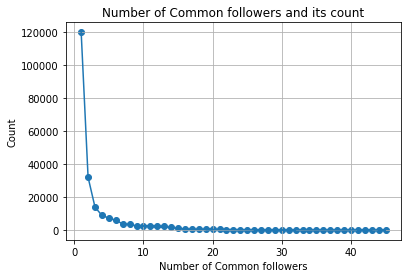

In [37]:
plt.plot(values, counts)
plt.scatter(values, counts)#Scatter Plot

plt.xlabel("Number of Common followers")
plt.ylabel("Count")
plt.title("Number of Common followers and its count")
plt.grid()
plt.show()

In [38]:
train_subset['num_of_common_followees'] = train_subset.apply(lambda row: num_of_common_followees(row['source_node'],row['destination_node']),axis=1)

In [39]:
train_subset.num_of_common_followees.unique()

array([  0,   1,   3,   2,   9,   4,  10,   8,   5,   7,   6,  11,  13,
        15,  25,  12,  49,  51,  31,  17,  20,  48, 134, 113, 121, 155,
       209, 129, 152, 149, 111, 170,  88, 109, 143,  24,  21,  37,  19,
        75,  60,  36,  58,  76,  14,  16,  61,  65,  70,  66,  27,  18,
       103, 107, 105,  69,  92,  81,  93,  39,  33,  32,  56,  47,  43,
        45,  34,  22, 131, 106, 203, 241, 162, 104,  77,  28, 226, 102,
       138, 151, 136,  72,  38,  63,  35,  59,  57, 178, 112, 173, 126,
       175, 154, 145, 128, 148, 174,  30,  46,  23,  86,  91,  82,  29,
        40,  41,  50,  53,  44,  90,  71,  68,  74,  52,  67,  78,  95,
        79,  94, 114,  96,  62,  55,  84,  42,  26,  89, 123, 122, 118,
       110, 101,  64, 120, 135, 116, 108,  83, 115,  80,  87, 159, 158,
       133, 150, 117, 119, 141, 161,  73, 125,  54,  98, 100,  85,  97,
       144, 124,  99, 130, 139, 140, 167, 157, 214, 198, 196, 187, 211,
       210, 219, 229, 202, 248, 171, 164, 160, 132, 137, 220, 21

In [40]:
value_counts = train_subset.num_of_common_followees.value_counts()
values = list(value_counts.index)[1:]
counts = list(value_counts)[1:]

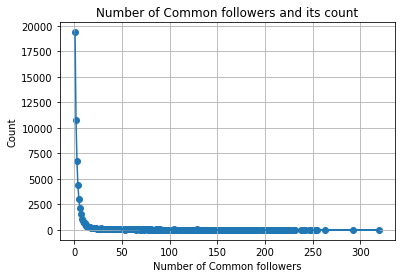

In [41]:
plt.plot(values, counts)
plt.scatter(values, counts)#Scatter plot

plt.xlabel("Number of Common followers")
plt.ylabel("Count")
plt.title("Number of Common followers and its count")
plt.grid()
plt.show()

## Jaccard Similarity for Followers and Followees

In [42]:
#Defining Jaccard Similarity for Followers function
def jaccard_followers(a,b):
    try:
        X = set(graph.predecessors(a))
        Y = set(graph.predecessors(b))
        if len(X) == 0  | len(Y) == 0:
            return 0
        similarity = len(X.intersection(Y))/len(X.union(Y))
        return similarity
    except:
        return 0

In [43]:
#Defining Jaccard Similarity for Followees function
def jaccard_followees(a,b):
    try:
        X = set(graph.successors(a))
        Y = set(graph.successors(b))
        if len(X) == 0  | len(Y) == 0:
            return 0
        similarity = len(X.intersection(Y))/len(X.union(Y))
    except:
        return 0
    return similarity

In [44]:
train_subset['jaccard_similarity_followers'] = train_subset.apply(lambda row: jaccard_followers(row['source_node'],row['destination_node']),axis=1)

In [45]:
train_subset['jaccard_similarity_followers'].head()

0    0.333333
1    0.000000
2    0.000000
3    0.000000
4    0.000000
Name: jaccard_similarity_followers, dtype: float64

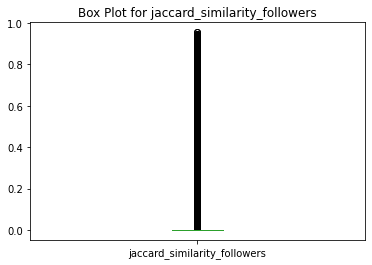

In [46]:
train_subset['jaccard_similarity_followers'].plot.box()
plt.title("Box Plot for jaccard_similarity_followers")#Box Plot
plt.show()

In [47]:
train_subset['jaccard_similarity_followers'].describe()

count    1000000.000000
mean           0.075920
std            0.174328
min            0.000000
25%            0.000000
50%            0.000000
75%            0.000000
max            0.954545
Name: jaccard_similarity_followers, dtype: float64

In [48]:
#Percentiles of jaccard_similarity_followers
print("Following are the Percentiles of jaccard_similarity_followers")
print("-"*50)
print("The 80 percentile values is : ",train_subset['jaccard_similarity_followers'].quantile(0.8))
print("The 90 percentile values is : ",train_subset['jaccard_similarity_followers'].quantile(0.9))
print("The 95 percentile values is : ",train_subset['jaccard_similarity_followers'].quantile(0.95))
print("The 99 percentile values is : ",train_subset['jaccard_similarity_followers'].quantile(0.99))
print("The 100 percentile values is : ",train_subset['jaccard_similarity_followers'].quantile(1))

Following are the Percentiles of jaccard_similarity_followers
--------------------------------------------------
The 80 percentile values is :  0.09090909090909091
The 90 percentile values is :  0.3333333333333333
The 95 percentile values is :  0.5
The 99 percentile values is :  0.75
The 100 percentile values is :  0.9545454545454546


In [49]:
train_subset['jaccard_similarity_followees'] = train_subset.apply(lambda row: jaccard_followees(row['source_node'],row['destination_node']),axis=1)

In [50]:
train_subset['jaccard_similarity_followees'].head()

0    0.000000
1    0.000000
2    0.166667
3    0.000000
4    0.000000
Name: jaccard_similarity_followees, dtype: float64

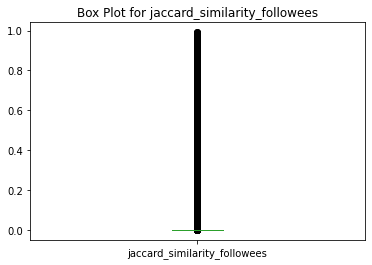

In [51]:
train_subset['jaccard_similarity_followees'].plot.box()
plt.title("Box Plot for jaccard_similarity_followees")#Box Plot
plt.show()

In [52]:
train_subset['jaccard_similarity_followees'].describe()

count    1000000.000000
mean           0.011588
std            0.068378
min            0.000000
25%            0.000000
50%            0.000000
75%            0.000000
max            0.991379
Name: jaccard_similarity_followees, dtype: float64

In [53]:
#the Percentiles of jaccard_similarity_followees
print("Following are the Percentiles of jaccard_similarity_followees")
print("-"*50)
print("The 80 percentile values is : ",train_subset['jaccard_similarity_followees'].quantile(0.8))
print("The 90 percentile values is : ",train_subset['jaccard_similarity_followees'].quantile(0.9))
print("The 95 percentile values is : ",train_subset['jaccard_similarity_followees'].quantile(0.95))
print("The 99 percentile values is : ",train_subset['jaccard_similarity_followees'].quantile(0.99))
print("The 100 percentile values is : ",train_subset['jaccard_similarity_followees'].quantile(1))

Following are the Percentiles of jaccard_similarity_followees
--------------------------------------------------
The 80 percentile values is :  0.0
The 90 percentile values is :  0.0
The 95 percentile values is :  0.04
The 99 percentile values is :  0.3333333333333333
The 100 percentile values is :  0.9913793103448276


## Cosine Similarity for Followers and Followees

In [54]:
#Defining Cosine Similarity for followers function
def cosine_followees(a,b):
    try:
        X = set(graph.successors(a))
        Y = set(graph.successors(b))
        if len(X) == 0  | len(Y) == 0:
            return 0
        similarity = len(X.intersection(Y))/(math.sqrt(len(X))*(len(Y)))
        return similarity
    except:
        return 0

In [55]:
#Defining Cosine Similarity for followees function
def cosine_followers(a,b):
    try:
        X = set(graph.predecessors(a))
        Y = set(graph.predecessors(b))
        if len(X) == 0  | len(Y) == 0:
            return 0
        similarity = len(X.intersection(Y))/(math.sqrt(len(X))*(len(Y)))
        return similarity
    except:
        return 0

In [56]:
train_subset['cosine_similarity_followers'] = train_subset.apply(lambda row: cosine_followers(row['source_node'],row['destination_node']),axis=1)

In [57]:
train_subset['cosine_similarity_followers'].head()

0    0.333333
1    0.000000
2    0.000000
3    0.000000
4    0.000000
Name: cosine_similarity_followers, dtype: float64

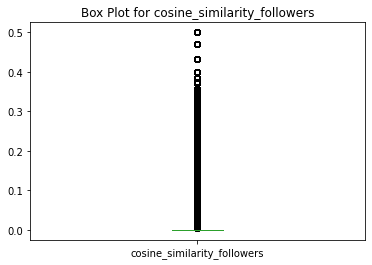

In [58]:
train_subset['cosine_similarity_followers'].plot.box()
plt.title("Box Plot for cosine_similarity_followers")#Box Plot
plt.show()

In [59]:
train_subset['cosine_similarity_followers'].describe()

count    1000000.000000
mean           0.054660
std            0.121311
min            0.000000
25%            0.000000
50%            0.000000
75%            0.000000
max            0.500000
Name: cosine_similarity_followers, dtype: float64

In [60]:
#Percentiles of cosine_similarity_followers
print("Following are the Percentiles of cosine_similarity_followers")
print("-"*50)
print("The 80 percentile values is : ",train_subset['cosine_similarity_followers'].quantile(0.8))
print("The 90 percentile values is : ",train_subset['cosine_similarity_followers'].quantile(0.9))
print("The 95 percentile values is : ",train_subset['cosine_similarity_followers'].quantile(0.95))
print("The 99 percentile values is : ",train_subset['cosine_similarity_followers'].quantile(0.99))
print("The 100 percentile values is : ",train_subset['cosine_similarity_followers'].quantile(1))

Following are the Percentiles of cosine_similarity_followers
--------------------------------------------------
The 80 percentile values is :  0.07155417527999328
The 90 percentile values is :  0.25
The 95 percentile values is :  0.35355339059327373
The 99 percentile values is :  0.5
The 100 percentile values is :  0.5


In [61]:
train_subset['cosine_similarity_followees'] = train_subset.apply(lambda row: cosine_followees(row['source_node'],row['destination_node']),axis=1)

In [62]:
train_subset['cosine_similarity_followees'].head()

0    0.000000
1    0.000000
2    0.144338
3    0.000000
4    0.000000
Name: cosine_similarity_followees, dtype: float64

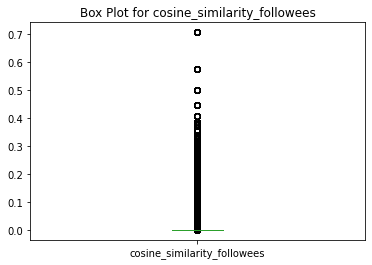

In [63]:
train_subset['cosine_similarity_followees'].plot.box()
plt.title("Box Plot for cosine_similarity_followees")#Box Plot
plt.show()

In [64]:
train_subset['cosine_similarity_followees'].describe()

count    1000000.000000
mean           0.005297
std            0.028907
min            0.000000
25%            0.000000
50%            0.000000
75%            0.000000
max            0.707107
Name: cosine_similarity_followees, dtype: float64

In [65]:
train_subset.drop(['cosine_similarity_followees'], axis=1,inplace=True)

## Is Detination Follows Back

In [66]:
#Defining follow back function
def follows_back(a,b):
    return 1 if graph.has_edge(b,a) else 0

In [67]:
train_subset['is_followed_back'] = train_subset.apply(lambda row: follows_back(row['source_node'],row['destination_node']),axis=1)

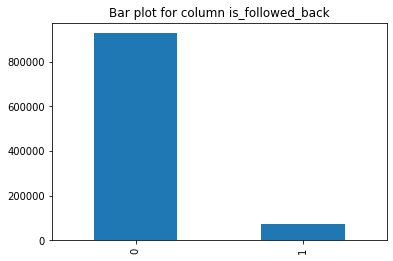

In [68]:
train_subset['is_followed_back'].value_counts().plot(kind='bar')
plt.title("Bar plot for column is_followed_back")#Bar Plot
plt.show()

In [69]:
#Displaying The final Features:
print("The final Feature we have so far:")
print("-"*50)
for column in train_subset.columns:
    print(column)
print("-"*50)
print("Total created features are :",len(train_subset.columns)-2)

The final Feature we have so far:
--------------------------------------------------
source_node
destination_node
num_of_source_followers
num_of_source_followees
num_of_destination_followers
num_of_destination_followees
num_of_common_followers
num_of_common_followees
jaccard_similarity_followers
jaccard_similarity_followees
cosine_similarity_followers
is_followed_back
--------------------------------------------------
Total created features are : 10


# Final Submission

## Shortest Path Length

In [70]:
#Defining get_shorterst_path_length function
def get_shorterst_path_length(source,target):
    if graph.has_edge(source,target):
        graph.remove_edge(source,target)
        try :
            length = nx.shortest_path_length(graph, source=source, target= target)
        except :
            length = -1
        graph.add_edge(source,target)
        return length
    else :
        if nx.has_path(graph,source, target):
            length = nx.shortest_path_length(graph, source=source, target= target)
        else :
            length = -1
        return length

In [73]:
get_shorterst_path_length(1, 690569)

2

In [123]:
train_subset['shortest_path_length'] = train_subset.apply(lambda row: get_shorterst_path_length(row['source_node'],row['destination_node']),axis=1)

In [124]:
train_subset.head(1)

,source_node,destination_node,num_of_source_followers,num_of_source_followees,num_of_destination_followers,num_of_destination_followees,num_of_common_followers,num_of_common_followees,jaccard_similarity_followers,jaccard_similarity_followees,...,hit_authorities_source,hit_authorities_destination,hit_hubs_source,hit_Hubs_destination,degree_centrality_source,degree_centrality_destination,outdegree_centrality_source,outdegree_centrality_destination,preferential_attachment_followers,shortest_path_length
0,1,690569,1,3,3,0,1,0,0.333333,0.0,...,2.398910e-21,-0.0,2.660412e-22,5.770346e-20,0.000006,0.000004,0.000004,0.0,3,2


In [125]:
train_subset['shortest_path_length'].head()

0    2
1   -1
2   -1
3   -1
4   -1
Name: shortest_path_length, dtype: int64

In [78]:
#importing seaborn library
import seaborn as sns

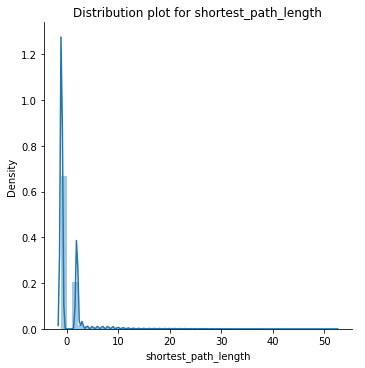

In [126]:
#Displaying data in form of grid using Facetgrid 
sns.FacetGrid(train_subset, height=5) \
   .map(sns.distplot, "shortest_path_length") \
   .add_legend();
#Distribution plot
plt.title("Distribution plot for shortest_path_length")
plt.show();

The Adamic/Adar index is a measure according to the number of shared links between two vertices. It is defined as the sum of the inverse logarithmic degree centrality of the neighbors shared by the two vertices.

In [80]:
#Defining Adar index function
def get_adar_index(a,b):
    total=0
    set_a = set(graph.successors(a))
    set_b = set(graph.successors(b))
    n_nodes=list(set_a.intersection(set_b))
    if len(n_nodes)!=0:
        return 0
    else:
        try :
            for n in n_nodes:
                total=total+(1/np.log10(len(list(graph.predecessors(n)))))
            return total
        except:
            return 0

In [81]:
train_subset['adar_index'] = train_subset.apply(lambda row: get_adar_index(row['source_node'],row['destination_node']),axis=1)
train_subset['adar_index'].head(5)

0    0
1    0
2    0
3    0
4    0
Name: adar_index, dtype: int64

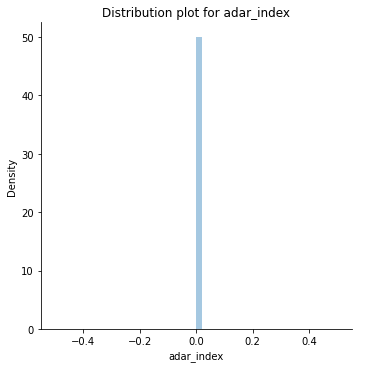

In [82]:
#Displaying data in form of grid using Facetgrid 
sns.FacetGrid(train_subset, height=5) \
   .map(sns.distplot, "adar_index") \
   .add_legend();
#Distribution plot
plt.title("Distribution plot for adar_index")
plt.show();

## Page Rank

In [83]:
#PageRank of the nodes in the graph.
pr = nx.pagerank(graph, alpha=0.9)

In [84]:
pr.get(1)

1.4666738837006319e-06

In [85]:
train_subset['page_rank_source'] = train_subset['source_node'].map(pr)
train_subset.head()

,source_node,destination_node,num_of_source_followers,num_of_source_followees,num_of_destination_followers,num_of_destination_followees,num_of_common_followers,num_of_common_followees,jaccard_similarity_followers,jaccard_similarity_followees,cosine_similarity_followers,is_followed_back,shorterst_path_length,adar_index,page_rank_source
0,1,690569,1,3,3,0,1,0,0.333333,0.000000,0.333333,0,2,0,0.000001
1,1,315892,1,3,2,0,0,0,0.000000,0.000000,0.000000,0,-1,0,0.000001
2,1,189226,1,3,2,4,0,1,0.000000,0.166667,0.000000,1,-1,0,0.000001
3,2,834328,0,6,5,0,0,0,0.000000,0.000000,0.000000,0,-1,0,0.000001
4,2,1615927,0,6,2,0,0,0,0.000000,0.000000,0.000000,0,-1,0,0.000001


In [86]:
train_subset['page_rank_destination'] = train_subset['destination_node'].map(pr)
train_subset.head()

,source_node,destination_node,num_of_source_followers,num_of_source_followees,num_of_destination_followers,num_of_destination_followees,num_of_common_followers,num_of_common_followees,jaccard_similarity_followers,jaccard_similarity_followees,cosine_similarity_followers,is_followed_back,shorterst_path_length,adar_index,page_rank_source,page_rank_destination
0,1,690569,1,3,3,0,1,0,0.333333,0.000000,0.333333,0,2,0,0.000001,0.000002
1,1,315892,1,3,2,0,0,0,0.000000,0.000000,0.000000,0,-1,0,0.000001,0.000002
2,1,189226,1,3,2,4,0,1,0.000000,0.166667,0.000000,1,-1,0,0.000001,0.000002
3,2,834328,0,6,5,0,0,0,0.000000,0.000000,0.000000,0,-1,0,0.000001,0.000002
4,2,1615927,0,6,2,0,0,0,0.000000,0.000000,0.000000,0,-1,0,0.000001,0.000001


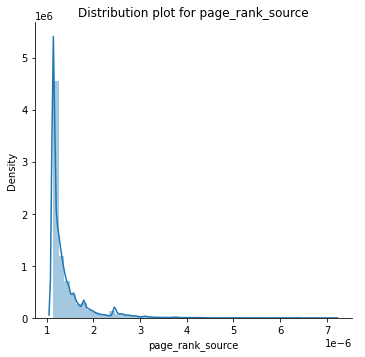

In [87]:
#Displaying data in form of grid using Facetgrid 
sns.FacetGrid(train_subset, height=5) \
   .map(sns.distplot, "page_rank_source") \
   .add_legend();
#Distribution plot
plt.title("Distribution plot for page_rank_source")
plt.show();

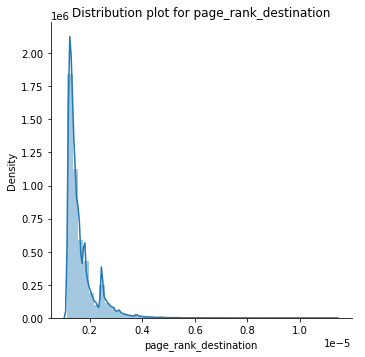

In [88]:
##Displaying data in form of grid using Facetgrid 
sns.FacetGrid(train_subset, height=5) \
   .map(sns.distplot, "page_rank_destination") \
   .add_legend();
#Distribution Plot
plt.title("Distribution plot for page_rank_destination")
plt.show();

## Hit Score

In [89]:
#Returning HITS hubs and authorities values for nodes.
hits = nx.hits(graph, max_iter=100, tol=1e-08, nstart=None, normalized=True)

In [90]:
train_subset['hit_authorities_source'] = train_subset['source_node'].map(hits[0])
train_subset['hit_authorities_source'].head()

0    2.398910e-21
1    2.398910e-21
2    2.398910e-21
3    1.496101e-21
4    1.496101e-21
Name: hit_authorities_source, dtype: float64

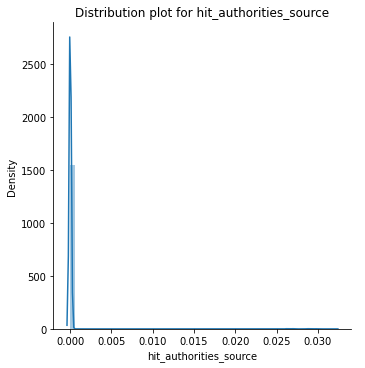

In [91]:
##Displaying data in form of grid using Facetgrid 
sns.FacetGrid(train_subset, height=5) \
   .map(sns.distplot, "hit_authorities_source") \
   .add_legend();
#Distribution Plot
plt.title("Distribution plot for hit_authorities_source")
plt.show();

In [92]:
train_subset['hit_authorities_destination'] = train_subset['destination_node'].map(hits[0])
train_subset['hit_authorities_destination'].head()

0   -0.000000e+00
1   -0.000000e+00
2    2.736062e-21
3   -0.000000e+00
4   -0.000000e+00
Name: hit_authorities_destination, dtype: float64

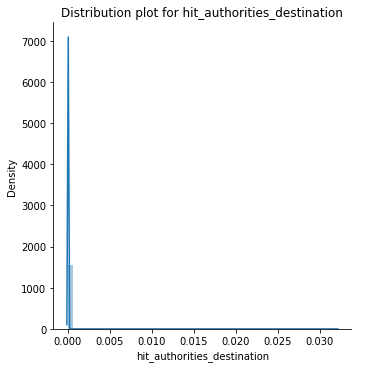

In [93]:
##Displaying data in form of grid using Facetgrid 
sns.FacetGrid(train_subset, height=5) \
   .map(sns.distplot, "hit_authorities_destination") \
   .add_legend();
plt.title("Distribution plot for hit_authorities_destination")#Distribution Plot
plt.show();

In [94]:
train_subset['hit_hubs_source'] = train_subset['source_node'].map(hits[1])
train_subset['hit_hubs_source'].head()

0    2.660412e-22
1    2.660412e-22
2    2.660412e-22
3   -0.000000e+00
4   -0.000000e+00
Name: hit_hubs_source, dtype: float64

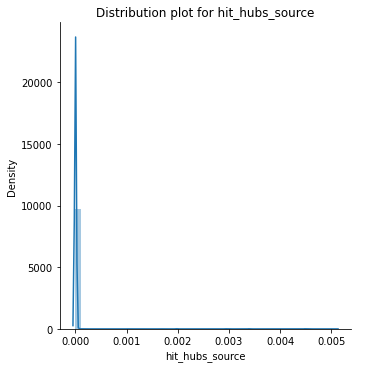

In [95]:
#Displaying data in form of grid using Facetgrid 
sns.FacetGrid(train_subset, height=5) \
   .map(sns.distplot, "hit_hubs_source") \
   .add_legend();
plt.title("Distribution plot for hit_hubs_source")#Distribution Plot
plt.show();

In [96]:
train_subset['hit_Hubs_destination'] = train_subset['destination_node'].map(hits[1])
train_subset['hit_Hubs_destination'].head()

0    5.770346e-20
1   -4.305351e-22
2   -8.469637e-23
3    4.247012e-22
4    3.714818e-21
Name: hit_Hubs_destination, dtype: float64

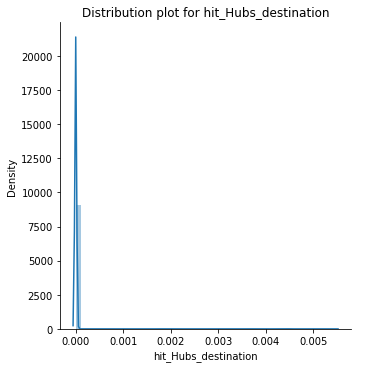

In [97]:
##Displaying data in form of grid using Facetgrid 
sns.FacetGrid(train_subset, height=5) \
   .map(sns.distplot, "hit_Hubs_destination") \
   .add_legend();
plt.title("Distribution plot for hit_Hubs_destination")#Distribution Plot
plt.show();

## Indegree and Out degree centrality

In [98]:
#Defining get_indegree_centrality function
def get_indegree_centrality(a):
    try :
        return nx.group_in_degree_centrality(graph, list(graph.predecessors(a)))
    except :
        return 0

In [99]:
#Defining get_outdegree_centrality function
def get_outdegree_centrality(a):
    try :
        return nx.group_out_degree_centrality(graph, list(graph.successors(a)))
    except :
        return 0

## Degree Centrality

In [100]:
#The degree centrality for a node
degree_centrality = nx.degree_centrality(graph)

In [101]:
#Displaying Degree Centrality
degree_centrality

{1: 5.832825391455494e-06,
 690569: 4.3746190435916205e-06,
 315892: 2.916412695727747e-06,
 189226: 8.749238087183241e-06,
 2: 8.749238087183241e-06,
 834328: 7.291031739319368e-06,
 1615927: 2.916412695727747e-06,
 1194519: 5.832825391455494e-06,
 470294: 2.916412695727747e-06,
 961886: 1.4582063478638736e-06,
 626040: 1.4582063478638736e-06,
 3: 8.749238087183241e-06,
 176995: 2.1873095217958103e-05,
 624722: 7.291031739319368e-06,
 412447: 4.3746190435916205e-06,
 1263124: 4.3746190435916205e-06,
 278432: 2.916412695727747e-06,
 539336: 2.916412695727747e-06,
 4: 4.3746190435916205e-06,
 6271: 4.8120809479507825e-05,
 1859286: 1.4582063478638736e-06,
 5: 2.916412695727747e-06,
 1646876: 1.4582063478638736e-06,
 677005: 2.916412695727747e-06,
 6: 1.4582063478638736e-06,
 1576703: 5.832825391455494e-06,
 7: 7.291031739319368e-06,
 1760879: 1.4582063478638736e-06,
 80397: 5.832825391455494e-06,
 778186: 1.4582063478638736e-06,
 8: 1.4582063478638736e-06,
 772194: 2.916412695727747e-06

In [102]:
train_subset['degree_centrality_source'] = train_subset['source_node'].map(degree_centrality)
train_subset['degree_centrality_source'].head()

0    0.000006
1    0.000006
2    0.000006
3    0.000009
4    0.000009
Name: degree_centrality_source, dtype: float64

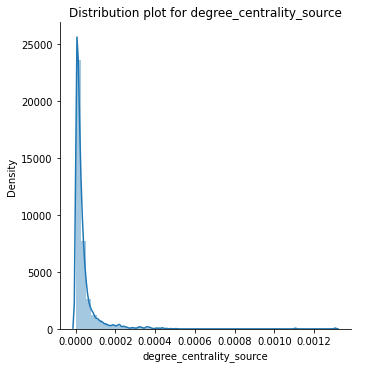

In [103]:
#Displaying data in form of grid using Facetgrid 
sns.FacetGrid(train_subset, height=5) \
   .map(sns.distplot, "degree_centrality_source") \
   .add_legend();
plt.title("Distribution plot for degree_centrality_source")#Distribution Plot
plt.show();

In [104]:
train_subset['degree_centrality_destination'] = train_subset['destination_node'].map(degree_centrality)
train_subset['degree_centrality_destination'].head()

0    0.000004
1    0.000003
2    0.000009
3    0.000007
4    0.000003
Name: degree_centrality_destination, dtype: float64

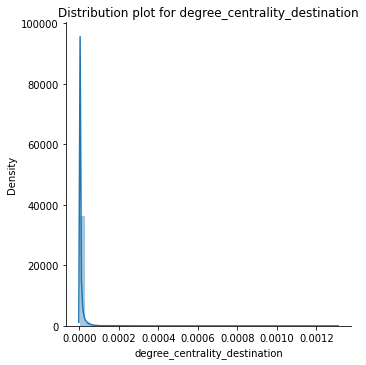

In [105]:
#Displaying data in form of grid using Facetgrid 
sns.FacetGrid(train_subset, height=5) \
   .map(sns.distplot, "degree_centrality_destination") \
   .add_legend();
plt.title("Distribution plot for degree_centrality_destination")#Distribution Plot
plt.show();

In [106]:
train_subset['outdegree_centrality_source'] = train_subset['source_node'].apply(get_outdegree_centrality)
train_subset['outdegree_centrality_source'].head()

0    0.000004
1    0.000004
2    0.000004
3    0.000000
4    0.000000
Name: outdegree_centrality_source, dtype: float64

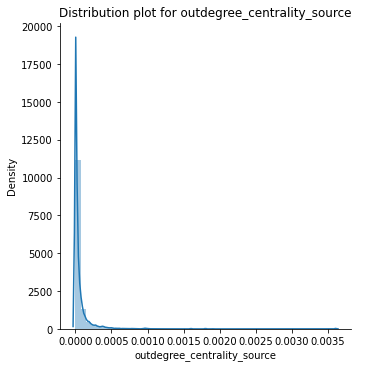

In [107]:
#Displaying data in form of grid using Facetgrid 
sns.FacetGrid(train_subset, height=5) \
   .map(sns.distplot, "outdegree_centrality_source") \
   .add_legend();
plt.title("Distribution plot for outdegree_centrality_source")#Distribution Plot
plt.show();

In [108]:
train_subset['outdegree_centrality_destination'] = train_subset['destination_node'].apply(get_outdegree_centrality)
train_subset['outdegree_centrality_destination'].head()

0    0.000000
1    0.000000
2    0.000004
3    0.000000
4    0.000000
Name: outdegree_centrality_destination, dtype: float64

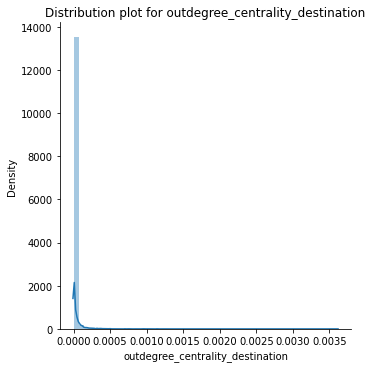

In [109]:
#Displaying data in form of grid using Facetgrid 
sns.FacetGrid(train_subset, height=5) \
   .map(sns.distplot, "outdegree_centrality_destination") \
   .add_legend();
plt.title("Distribution plot for outdegree_centrality_destination")#Distribution Plot
plt.show();

In [110]:
#Defining preferential_attachment_followees function
def preferential_attachment_followees(a,b):
    try:
        if len(set(graph.successors(a))) == 0  | len(set(graph.successors(b))) == 0:
            return 0
        score = len(set(graph.successors(a)))*len(set(graph.successors(b)))                             
    except:
        return 0
    return score

In [111]:
##Defining preferential_attachment_followers function
def preferential_attachment_followers(a,b):
    try:
        if len(set(graph.predecessors(a))) == 0  | len(set(graph.predecessors(b))) == 0:
            return 0
        score = len(set(graph.predecessors(a)))*len(set(graph.predecessors(b)))                             
    except:
        return 0
    return score

In [112]:
train_subset['preferential_attachment_followers'] = train_subset.apply(lambda row:
                                            preferential_attachment_followers(row['source_node'],row['destination_node']),axis=1)

In [113]:
train_subset['preferential_attachment_followers'].head()

0    3
1    2
2    2
3    0
4    0
Name: preferential_attachment_followers, dtype: int64

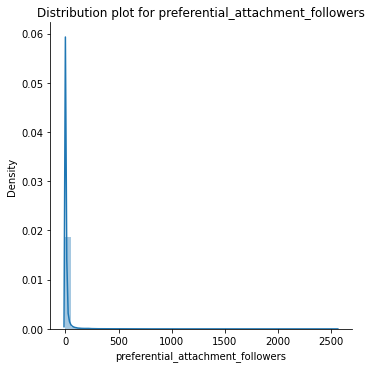

In [114]:
#Displaying data in form of grid using Facetgrid 
sns.FacetGrid(train_subset, height=5) \
   .map(sns.distplot, "preferential_attachment_followers") \
   .add_legend();
plt.title("Distribution plot for preferential_attachment_followers")#Distribution Plot
plt.show();

In [115]:
train_subset['preferential_attachment_followees'] = train_subset.apply(lambda row:
                                            preferential_attachment_followees(row['source_node'],row['destination_node']),axis=1)

In [116]:
train_subset['preferential_attachment_followees'].head()

0     0
1     0
2    12
3     0
4     0
Name: preferential_attachment_followees, dtype: int64

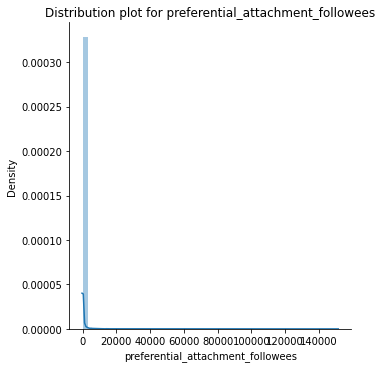

In [117]:
#Displaying data in form of grid using Facetgrid 
sns.FacetGrid(train_subset, height=5) \
   .map(sns.distplot, "preferential_attachment_followees") \
   .add_legend();
plt.title("Distribution plot for preferential_attachment_followees")#Distribution Plot
plt.show();

In [118]:
train_subset.head(5)

,source_node,destination_node,num_of_source_followers,num_of_source_followees,num_of_destination_followers,num_of_destination_followees,num_of_common_followers,num_of_common_followees,jaccard_similarity_followers,jaccard_similarity_followees,...,hit_authorities_source,hit_authorities_destination,hit_hubs_source,hit_Hubs_destination,degree_centrality_source,degree_centrality_destination,outdegree_centrality_source,outdegree_centrality_destination,preferential_attachment_followers,preferential_attachment_followees
0,1,690569,1,3,3,0,1,0,0.333333,0.000000,...,2.398910e-21,-0.000000e+00,2.660412e-22,5.770346e-20,0.000006,0.000004,0.000004,0.000000,3,0
1,1,315892,1,3,2,0,0,0,0.000000,0.000000,...,2.398910e-21,-0.000000e+00,2.660412e-22,-4.305351e-22,0.000006,0.000003,0.000004,0.000000,2,0
2,1,189226,1,3,2,4,0,1,0.000000,0.166667,...,2.398910e-21,2.736062e-21,2.660412e-22,-8.469637e-23,0.000006,0.000009,0.000004,0.000004,2,12
3,2,834328,0,6,5,0,0,0,0.000000,0.000000,...,1.496101e-21,-0.000000e+00,-0.000000e+00,4.247012e-22,0.000009,0.000007,0.000000,0.000000,0,0
4,2,1615927,0,6,2,0,0,0,0.000000,0.000000,...,1.496101e-21,-0.000000e+00,-0.000000e+00,3.714818e-21,0.000009,0.000003,0.000000,0.000000,0,0


In [119]:
train_subset.columns

Index(['source_node', 'destination_node', 'num_of_source_followers',
       'num_of_source_followees', 'num_of_destination_followers',
       'num_of_destination_followees', 'num_of_common_followers',
       'num_of_common_followees', 'jaccard_similarity_followers',
       'jaccard_similarity_followees', 'cosine_similarity_followers',
       'is_followed_back', 'shorterst_path_length', 'adar_index',
       'page_rank_source', 'page_rank_destination', 'hit_authorities_source',
       'hit_authorities_destination', 'hit_hubs_source',
       'hit_Hubs_destination', 'degree_centrality_source',
       'degree_centrality_destination', 'outdegree_centrality_source',
       'outdegree_centrality_destination', 'preferential_attachment_followers',
       'preferential_attachment_followees'],
      dtype='object')

In [120]:
train_subset.drop(['adar_index','preferential_attachment_followees'],axis=1,inplace=True)

In [121]:
#Displaying Final Features
print("The final features are:")
for i,column in enumerate(train_subset.columns):
    print("{}. {}".format(i+1,column))

The final features are:
1. source_node
2. destination_node
3. num_of_source_followers
4. num_of_source_followees
5. num_of_destination_followers
6. num_of_destination_followees
7. num_of_common_followers
8. num_of_common_followees
9. jaccard_similarity_followers
10. jaccard_similarity_followees
11. cosine_similarity_followers
12. is_followed_back
13. shorterst_path_length
14. page_rank_source
15. page_rank_destination
16. hit_authorities_source
17. hit_authorities_destination
18. hit_hubs_source
19. hit_Hubs_destination
20. degree_centrality_source
21. degree_centrality_destination
22. outdegree_centrality_source
23. outdegree_centrality_destination
24. preferential_attachment_followers
